## Reto 3: Gráficas de Dispersión

### 1. Objetivos:
    - Aprender a generar e interpretar gráficas de dispersión
    - Utilizar gráficas de dispersión para complementar el análisis hecho con la matriz de correlación

---
    
### 2. Desarrollo:

Espero que haya quedado claro en el Ejemplo pasado que las gráficas de dispersión pueden ser extremadamente útiles para encontrar incosistencias, errores y valores atípicos en nuestro dataset.

Vamos a complementar el análisis realizado en el Reto pasado con unas gráficas de dispersión. El objetivo de este Reto es utilizar todas las herramientas que hemos acumulado hasta el momento para preparar nuestro dataset para realizar predicciones con él. Vamos a volver a utilizar el dataset 'wine_quality_red-clean.csv'. Realiza los siguientes pasos:

1. Vuelve a generar tu matriz de correlaciones para tenerla disponible
2. Realiza gráficas de dispersión de los pares de variables que parezcan más prometedores (en los que la fuerza de la correlación sea más fuerte)
3. También realiza gráficas de dispersión de los pares de variables que no tengan un coeficiente de correlación alto, **pero** que tú creas intuitivamente que *deberían* de tener una correlación.
4. Utilizando estas gráficas de dispersión, y complementando el análisis con promedios, medianas, desviación estándar, boxplots e histogramas, elimina del dataset los valores que consideres como atípicos.
5. Crea una nueva matriz de correlación para ver si tus coeficientes han sido modificados o no.
6. Comenta con tus compañeros y la experta tus hallazgos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv('/content/drive/MyDrive/winequality-red (1).csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


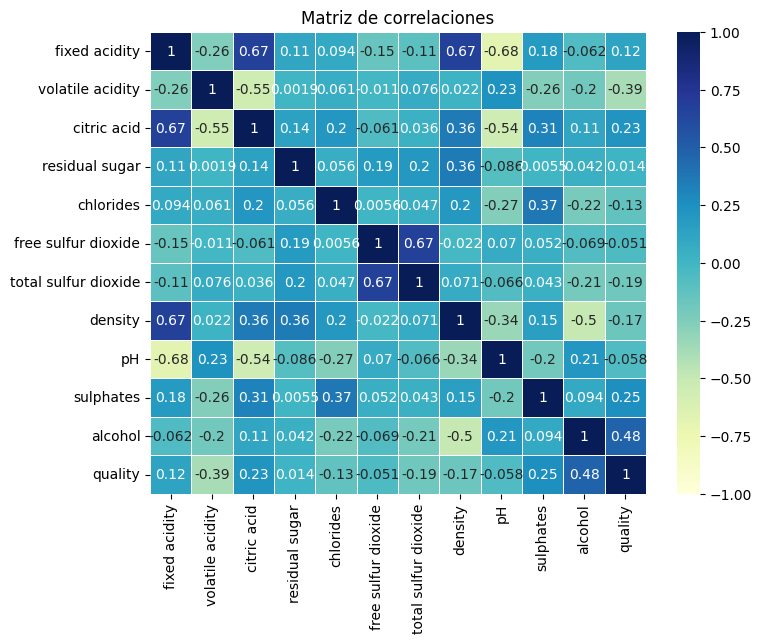

In [12]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Matriz de correlaciones')
plt.show()